# Limpieza de datos

Realice las operaciones y describa lo que va encontrando


## 1. Vista rápida al dataset


In [28]:
#Primero importo las librerias
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

In [2]:
# Lectura
# df = pd.read_csv("dataset_videojuegos.csv",index_col=0) # Para que tenga el nombre como id asi las busquedas serán mas rapidas y eficientes
df = pd.read_csv("dataset_videojuegos.csv")
#Decidi al final no dejar name cono indice ya que al parecer hay nombres duplicados en el dataset

In [3]:
#Vista de la informacion del data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18800 entries, 0 to 18799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          18800 non-null  object
 1   platform      18800 non-null  object
 2   release_date  18800 non-null  object
 3   summary       18686 non-null  object
 4   meta_score    18800 non-null  int64 
 5   user_review   18800 non-null  object
dtypes: int64(1), object(5)
memory usage: 881.4+ KB


In [4]:
df.head()

,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9


## 2. Datos duplicados

In [10]:
#Verifico con duplicated().sum() si hay duplicados y si hay que los sume para ver cuandos datos duplicados tengo en el data set
print(df.duplicated().sum())
#(Si ejecutaba con el name en indice aparecian 3 duplicados)


0


## 3. Datos nulos
Muestre por columnas la cantidad de datos nulos, implemente una estrategia para no dejar ningun dato nulo, no elimine ningún dato.


In [6]:
for col in df.columns:
    por = df[col].isnull().sum() / len(df) * 100  # Porcentaje
    val = df[col].isnull().sum()
    if val > 0:
        print(f"Columna: '{col}' - Filas con nulos: {val} - Porcentaje: {por:.2f}%")


Columna: 'summary' - Filas con nulos: 114 - Porcentaje: 0.61%


In [7]:
#Para no dejar ningun dato como nulo sin eliminar esas filas voy a rellenar esos datos con "desconocido" para no perder informacion valiosa
# Rellenar valores faltantes en columnas categóricas
df['summary'].fillna('Desconocido', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18800 entries, 0 to 18799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          18800 non-null  object
 1   platform      18800 non-null  object
 2   release_date  18800 non-null  object
 3   summary       18800 non-null  object
 4   meta_score    18800 non-null  int64 
 5   user_review   18800 non-null  object
dtypes: int64(1), object(5)
memory usage: 881.4+ KB


C:\Users\OCHOA\AppData\Local\Temp\ipykernel_24120\970426389.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['summary'].fillna('Desconocido', inplace=True)


## 4. Verifique outlaiers de cada fila

Filas con outliers en meta_score:
                                                    name        platform  \
18541                                Tenchu: Dark Secret              DS   
18542                        Napoleon Dynamite: The Game             PSP   
18543  Torino 2006 - The Official Video Game of the X...              PC   
18544                                        Pocket Pool             PSP   
18545                                         Speed Zone             Wii   
...                                                  ...             ...   
18795                           Fast & Furious: Showdown        Xbox 360   
18796                            Drake of the 99 Dragons            Xbox   
18797         Afro Samurai 2: Revenge of Kuma Volume One   PlayStation 4   
18798          Infestation: Survivor Stories (The War Z)              PC   
18799                Leisure Suit Larry: Box Office Bust              PC   

             release_date                            

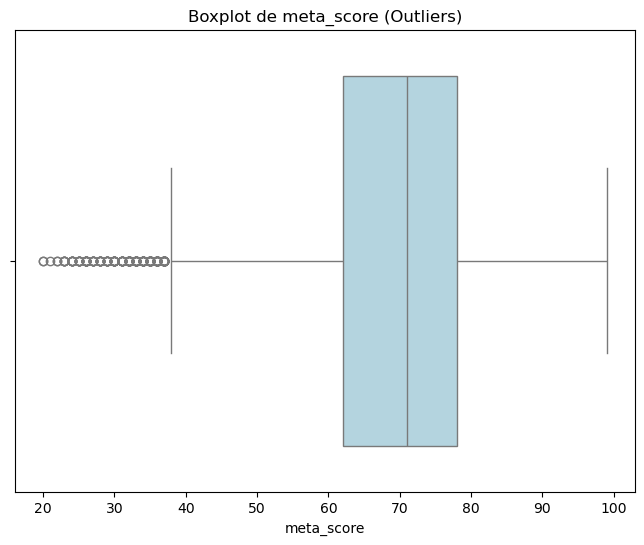

Filas identificadas como outliers:
                                             name        platform  \
0            The Legend of Zelda: Ocarina of Time     Nintendo 64   
5                              Super Mario Galaxy             Wii   
6                            Super Mario Galaxy 2             Wii   
18                                  Metroid Prime        GameCube   
20                            Super Mario Odyssey          Switch   
...                                           ...             ...   
18795                    Fast & Furious: Showdown        Xbox 360   
18796                     Drake of the 99 Dragons            Xbox   
18797  Afro Samurai 2: Revenge of Kuma Volume One   PlayStation 4   
18798   Infestation: Survivor Stories (The War Z)              PC   
18799         Leisure Suit Larry: Box Office Bust              PC   

             release_date                                            summary  \
0       November 23, 1998  As a young boy, Link is trick

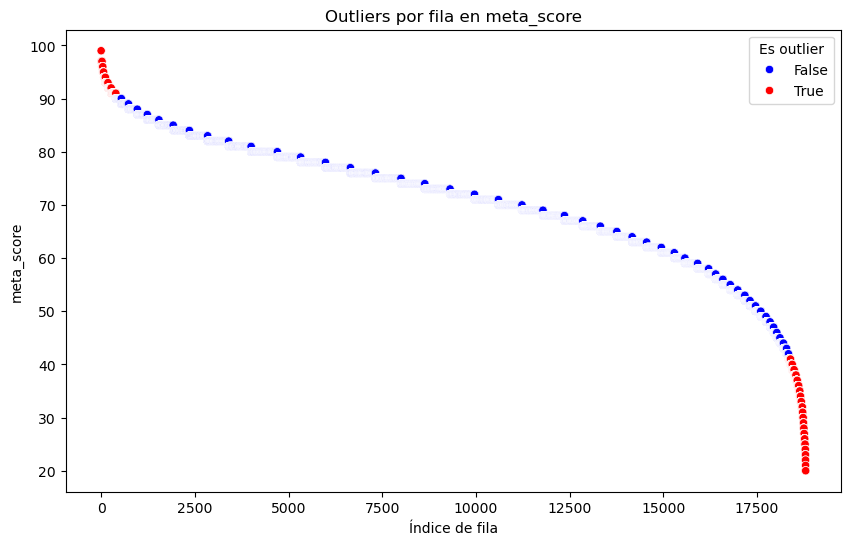

In [30]:
#Ahora para verificar los outlaiers por fila

# # Supongamos que tu DataFrame se llama df
# Q1 = df['meta_score'].quantile(0.25)
# Q3 = df['meta_score'].quantile(0.75)
# IQR = Q3 - Q1

# # Definir los límites para identificar outliers
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Filtrar los outliers
# outliers = df[(df['meta_score'] < lower_bound) | (df['meta_score'] > upper_bound)]
# print(outliers)
# Calcular el IQR para meta_score
Q1 = df['meta_score'].quantile(0.25)
Q3 = df['meta_score'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar filas con outliers en meta_score
outliers = df[(df['meta_score'] < lower_bound) | (df['meta_score'] > upper_bound)]
print("Filas con outliers en meta_score:")
print(outliers)
# Crear un boxplot para meta_score
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['meta_score'], color='lightblue')
plt.title('Boxplot de meta_score (Outliers)')
plt.xlabel('meta_score')
plt.show()


# Seleccionar solo la columna numérica (meta_score)
X = df[['meta_score']]

# Aplicar Isolation Forest
iso_forest = IsolationForest(contamination=0.05)  # Ajusta el porcentaje de outliers esperado
outliers = iso_forest.fit_predict(X)

# Añadir una columna al DataFrame para identificar outliers
df['is_outlier'] = outliers == -1

# Filtrar filas que son outliers
outliers_df = df[df['is_outlier']]
print("Filas identificadas como outliers:")
print(outliers_df)
# Crear un scatter plot para visualizar outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y=df['meta_score'], hue=df['is_outlier'], palette={True: 'red', False: 'blue'})
plt.title('Outliers por fila en meta_score')
plt.xlabel('Índice de fila')
plt.ylabel('meta_score')
plt.legend(title='Es outlier')
plt.show()

## 4.1 Datos numéricos

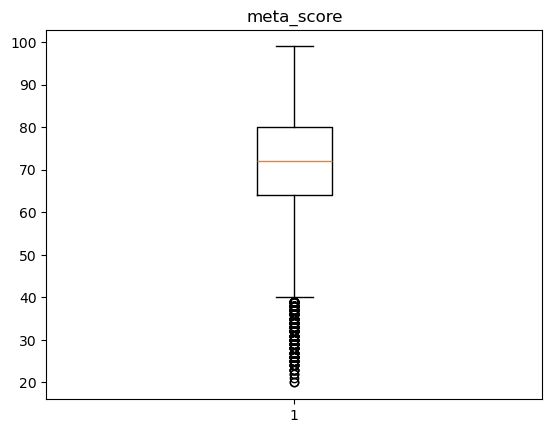

Empty DataFrame
Columns: [name, platform, release_date, summary, meta_score, user_review]
Index: []


,name,platform,release_date,summary,meta_score,user_review
18798,Infestation: Survivor Stories (The War Z),PC,"October 15, 2012","(Formerly known as ""The War Z"") It has been 5 ...",20,1.7
18799,Leisure Suit Larry: Box Office Bust,PC,"March 31, 2009",The Leisure Suit Larry: Box Office Bust video ...,20,2.0


In [27]:
# Comienzo graficando 'meta_score'

plt.boxplot(df['meta_score'])
plt.title('meta_score')
plt.show()

print(df[df['meta_score']>100])
df[df['meta_score']<=20]
#Puede que si sea una calificacion muy baja para algun juego pero no hay valores megativos ni mayores al maximo que es 100

## 4.2 Datos categóricos

In [27]:
#Como obtener las columnas con valores categoricos 'Object' y eso es tipo cadena
cols_categoricos = df.select_dtypes(include = ['object']).columns
cols_categoricos

Index(['name', 'platform', 'release_date', 'summary', 'user_review'], dtype='object')

In [22]:
#Conteo de los valores diferentes por columna
for col in cols_categoricos:
    print(f"Columna {col}: {df[col].unique()} valores \n {df[col].nunique()} subniveles ")
    print(f"NUMERO DE DUPLICADOOOOOO Columna {col}: {df[col].duplicated().sum()}")

Columna name: ['The Legend of Zelda: Ocarina of Time' "Tony Hawk's Pro Skater 2"
 'Grand Theft Auto IV' ... 'Drake of the 99 Dragons'
 'Afro Samurai 2: Revenge of Kuma Volume One'
 'Infestation: Survivor Stories (The War Z)'] valores 
 12254 subniveles 
NUMERO DE DUPLICADOOOOOO Columna name: 6546
Columna platform: [' Nintendo 64' ' PlayStation' ' PlayStation 3' ' Dreamcast' ' Xbox 360'
 ' Wii' ' Xbox One' ' PC' ' Switch' ' PlayStation 2' ' PlayStation 4'
 ' GameCube' ' Xbox' ' Wii U' ' Game Boy Advance' ' 3DS' ' Xbox Series X'
 ' DS' ' PlayStation Vita' ' PlayStation 5' ' PSP' ' Stadia'] valores 
 22 subniveles 
NUMERO DE DUPLICADOOOOOO Columna platform: 18778
Columna release_date: ['November 23, 1998' 'September 20, 2000' 'April 29, 2008' ...
 'July 5, 2007' 'April 25, 2001' 'July 6, 2006'] valores 
 4533 subniveles 
NUMERO DE DUPLICADOOOOOO Columna release_date: 14267
Columna summary: ['As a young boy, Link is tricked by Ganondorf, the King of the Gerudo Thieves. The evil human uses 

### Despues de verificar si hay duplicados puedo decir que en las demas columnas lo veo normal como 'plataform' pero en 'name' no podria decir lo mismo que tan normal sea que haya names repetidos segun yo no deberia ser normal

In [23]:
df.drop_duplicates(subset=['name'], keep='last', inplace=True)  # Conserva la última ocurrencia

In [25]:
#Vuelvo a checar si tengo duplicados en 'name' en este caso que es el que yo lo vi anormal y puedo decir que ya no hay duplicados!
for col in cols_categoricos:
    print(f"Columna {col}: {df[col].unique()} valores \n {df[col].nunique()} subniveles ")
    print(f"NUMERO DE DUPLICADOOOOOO Columna {col}: {df[col].duplicated().sum()}")

Columna name: ['The Legend of Zelda: Ocarina of Time' 'Super Mario Galaxy'
 'Super Mario Galaxy 2' ... 'Afro Samurai 2: Revenge of Kuma Volume One'
 'Infestation: Survivor Stories (The War Z)'
 'Leisure Suit Larry: Box Office Bust'] valores 
 12254 subniveles 
NUMERO DE DUPLICADOOOOOO Columna name: 0
Columna platform: [' Nintendo 64' ' Wii' ' GameCube' ' Switch' ' Dreamcast' ' PC' ' Wii U'
 ' PlayStation 3' ' PlayStation' ' PlayStation 2' ' Xbox'
 ' Game Boy Advance' ' PlayStation 4' ' Xbox 360' ' 3DS' ' DS' ' Xbox One'
 ' PSP' ' Xbox Series X' ' PlayStation 5' ' PlayStation Vita' ' Stadia'] valores 
 22 subniveles 
NUMERO DE DUPLICADOOOOOO Columna platform: 12232
Columna release_date: ['November 23, 1998' 'November 12, 2007' 'May 23, 2010' ...
 'April 25, 2001' 'July 6, 2006' 'December 21, 2011'] valores 
 4185 subniveles 
NUMERO DE DUPLICADOOOOOO Columna release_date: 8069
Columna summary: ['As a young boy, Link is tricked by Ganondorf, the King of the Gerudo Thieves. The evil human 

In [ ]:
# por ultimo creo un nuevo dataset con los datos limpiados:
df.to_csv('netflix_titles_clean.csv')